In [6]:
from sklearn.decomposition import PCA

In [7]:
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [8]:
data=sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
le = LabelEncoder()

data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['day'] = le.fit_transform(data['day'])
data['time'] = le.fit_transform(data['time'])

print(data)


     total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    0       0    2     0     2
1         10.34  1.66    1       0    2     0     3
2         21.01  3.50    1       0    2     0     3
3         23.68  3.31    1       0    2     0     2
4         24.59  3.61    0       0    2     0     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    1       0    1     0     3
240       27.18  2.00    0       1    1     0     2
241       22.67  2.00    1       1    1     0     2
242       17.82  1.75    1       0    1     0     2
243       18.78  3.00    0       0    3     0     2

[244 rows x 7 columns]


In [10]:
x=data.drop(columns='tip')
y=data.tip

In [11]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [12]:
pca=PCA()
pca.fit_transform(x_scaled) 

array([[-0.64825187, -0.391193  , -0.14701599, -1.45843528,  0.58118349,
        -0.53326811],
       [-0.03672532,  0.02257671, -1.40831566, -0.05840716, -0.80855313,
        -0.57268766],
       [ 0.48424518,  0.62075703, -1.06174552,  0.00339783, -0.01338455,
        -0.33397486],
       ...,
       [ 1.16976895, -1.08075629,  0.39103161,  0.94435273,  0.30179418,
        -0.02892948],
       [ 0.53387373, -0.69995435, -1.26215372, -0.09473659,  0.28306973,
         0.38954687],
       [-1.10713763,  0.20332829, -0.10652371, -1.20058864,  0.90726214,
        -1.21961039]])

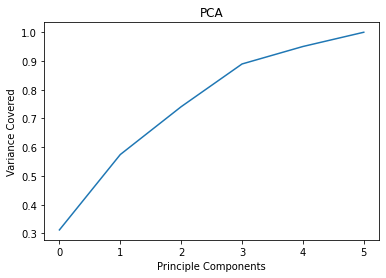

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principle Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

In [14]:
pca=PCA(n_components=6)
new_pump=pca.fit_transform(x_scaled)
princi_comp=pd.DataFrame(new_pump,
                        columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

In [15]:
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.648252,-0.391193,-0.147016,-1.458435,0.581183,-0.533268
1,-0.036725,0.022577,-1.408316,-0.058407,-0.808553,-0.572688
2,0.484245,0.620757,-1.061746,0.003398,-0.013385,-0.333975
3,0.273709,0.122739,-1.089465,0.186685,0.912460,-0.205740
4,0.404626,1.330284,0.328724,-1.750056,-0.306168,-0.500240
...,...,...,...,...,...,...
239,1.422111,0.576203,-0.783601,-0.197625,0.391615,0.571840
240,0.794657,-0.966795,1.697265,-0.635893,0.805184,-0.105887
241,1.169769,-1.080756,0.391032,0.944353,0.301794,-0.028929
242,0.533874,-0.699954,-1.262154,-0.094737,0.283070,0.389547
